#chapter 03.

In [ ]:
#pandas, matplotlib, numpy 라이브러리 설치

!pip install pandas
!pip install matplotlib
!pip install numpy


 # 3장 

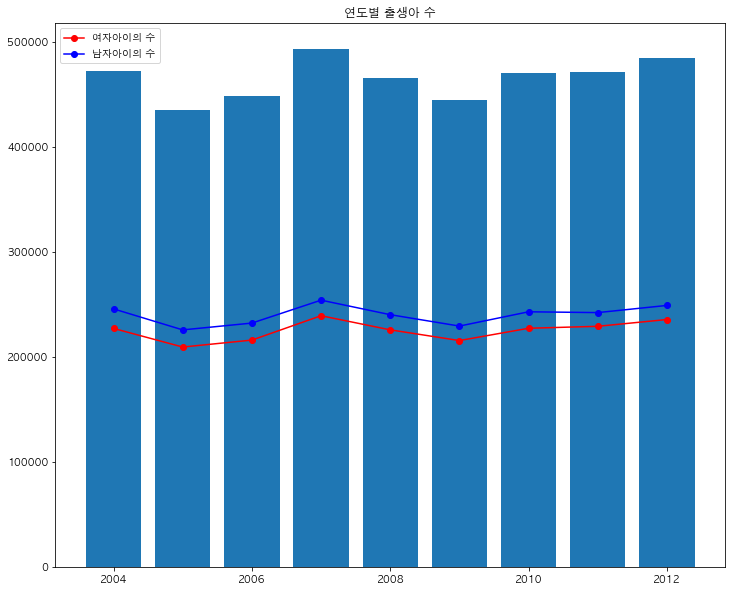


2004년부터 2012년까지 출생아 수의 평균:  465095

2004년부터 2012년까지 출생성비의 평균:  106

출생아수의 중앙값(홀수): 470171 
연도         2004      2005      2006      2007      2008      2009      2010  \
출생아 수  472761.0  435031.0  448153.0  493189.0  465892.0  444849.0  470171.0   
출생성비      108.2     107.8     107.5     106.2     106.4     106.4     106.9   

연도         2011      2012  
출생아 수  471265.0  484550.0  
출생성비      105.7     105.7  


연도,2004,2005,2006,2007,2008,2009,2010,2011,2012
출생아 수,472761.0,435031.0,448153.0,493189.0,465892.0,444849.0,470171.0,471265.0,484550.0
출생성비,108.2,107.8,107.5,106.2,106.4,106.4,106.9,105.7,105.7


In [2]:
#27번
#pandas, matplotlib 라이브러리 사용
import pandas as pd
import matplotlib.pyplot as plt

#dataframe 설정
data = [[472761, 435031, 448153, 493189, 465892, 444849, 470171, 471265, 484550], [108.2, 107.8, 107.5, 106.2, 106.4, 106.4, 106.9, 105.7, 105.7]]
columns = list(range(2004, 2013))
index = ['출생아 수', '출생성비']

df = pd.DataFrame(data, columns=columns, index=index)
df.columns.name = '연도'

female = [0 for _ in range(len(data[0]))]
male = [0 for _ in range(len(data[0]))]

for i in range(len(data[0])):
    male[i] = data[0][i] * (data[1][i]/(data[1][i]+100))
    female[i] = data[0][i] * (100/(data[1][i]+100))

#matplotlib을 통한 그래프 표현
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (12, 10)  

plt.bar(columns, data[0])

plt.plot(columns, female, marker='o', label='여자아이의 수' , color='r')
plt.plot(columns, male, marker='o', label='남자아이의 수' , color='b')
plt.legend()
plt.title('연도별 출생아 수')
plt.show()


## 대푯값

# 평균값
AVG_born = sum(data[0]) / len(data[0])
print("\n2004년부터 2012년까지 출생아 수의 평균: ", int(AVG_born))
AVG_sex = sum(data[1]) / len(data[1])
print("\n2004년부터 2012년까지 출생성비의 평균: ", int(AVG_sex))

#중앙값
CENTER_value = sorted(data[0])
N = len(CENTER_value)

if N%2 == 0 : # 짝수일 경우    
    M = (CENTER_value[int(N/2)]+CENTER_value[int(N/2+1)])/2   
    print(f'\n출생아수의 중앙값(짝수): {M} ')
else : # 홀수일 경우
    idx = int((N+1)/2)
    M = CENTER_value[idx-1]
    print(f'\n출생아수의 중앙값(홀수): {M} ')

print(df)
df





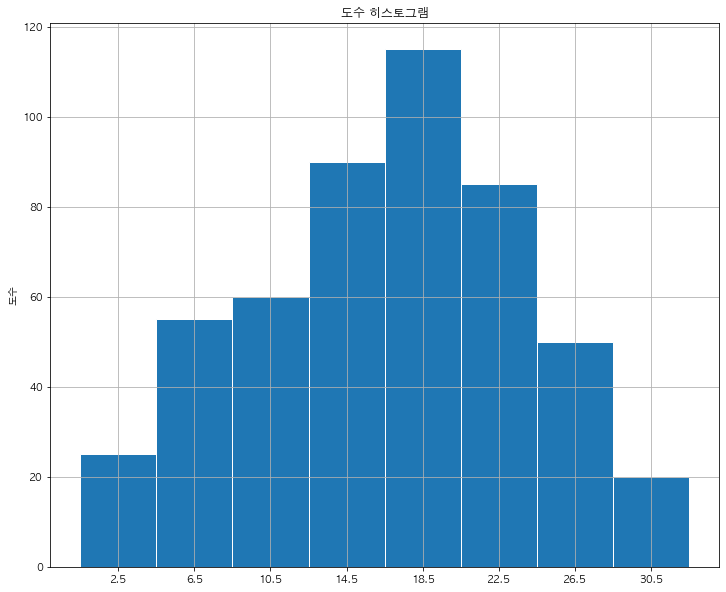

,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
0.5 ~ 4.5,25,0.05,25,0.05,2.5
4.5 ~ 8.5,55,0.11,80,0.16,6.5
8.5 ~ 12.5,60,0.12,140,0.28,10.5
12.5 ~ 16.5,90,0.18,230,0.46,14.5
16.5 ~ 20.5,115,0.23,345,0.69,18.5
20.5 ~ 24.5,85,0.17,430,0.86,22.5
24.5 ~ 28.5,50,0.10,480,0.96,26.5
28.5 ~ 32.5,20,0.04,500,1.0,30.5
합계,500,1.00,,,


In [3]:
#28번

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['figure.figsize'] = (12, 10)  
plt.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨짐 방지

#계급의 수
k = 8 
#계급 간격
w = 4 
#시작할 계급값
s = 0.5
#마지막 계급값
e = 32.5

#dataframe 설정
bins = np.arange(s, e+w, step=w)
index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ]
data = [25, 55, 60, 90, 115, 85, 50, 20]
data = np.array(data)
df = pd.DataFrame(data, index=index, columns=['도수'])
df['상대도수'] = [data[i]/sum(df['도수']) for i in range(len(index))]
df.index.name = '계급간격'

#도수 계산
frequency_weight = []
previous = 0
for i in data:
    previous += i
    frequency_weight.append(previous)

df['누적도수'] = [frequency_weight[i] for i in range(len(data))]

relative_weight = []
previous = 0
for i in df['상대도수']:
    previous += i
    relative_weight.append(previous)

df['누적상대도수'] = [relative_weight[i] for i in range(len(data))]

bins_value = []
for i in range(len(bins)):
    if (i<len(bins)-1):
        bins_value.append(((bins[i] + bins[i+1]) / 2))
df['계급값'] = [bins_value[i] for i in range(len(data))]

df.loc['합계'] = [sum(df['도수']), sum(df['상대도수']), '', '', '']

#도수히스토그램
# plt.title('도수 히스토그램')
# plt.xlabel('Bins')
# plt.ylabel('Frequency')
# plt.hist(frequency_weight, bins=len(bins), rwidth=0.8)

plt.bar(df['계급값'].values[:k], df['도수'].values[:k], width=4, edgecolor='w')
plt.title('도수 히스토그램')
plt.ylabel('도수')
plt.xticks(ticks=df['계급값'].values[:k], labels=df['계급값'].values[:k])
plt.grid()
plt.show()

df



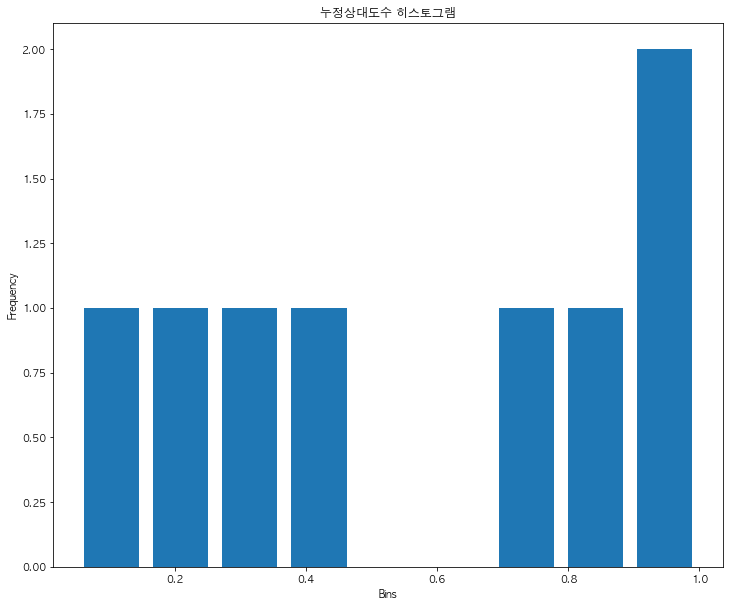

In [247]:
#28번

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['figure.figsize'] = (12, 10)  
plt.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨짐 방지

#계급의 수
k = 8 
#계급 간격
w = 4 
#시작할 계급값
s = 0.5
#마지막 계급값
e = 32.5

#dataframe 설정
bins = np.arange(s, e+w, step=w)
index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ]
data = [25, 55, 60, 90, 115, 85, 50, 20]
data = np.array(data)
df = pd.DataFrame(data, index=index, columns=['도수'])
df['상대도수'] = [data[i]/sum(df['도수']) for i in range(len(index))]
df.index.name = '계급간격'

#도수 계산
frequency_weight = []
previous = 0
for i in data:
    previous += i
    frequency_weight.append(previous)

df['누적도수'] = [frequency_weight[i] for i in range(len(data))]

relative_weight = []
previous = 0
for i in df['상대도수']:
    previous += i
    relative_weight.append(previous)

df['누적상대도수'] = [relative_weight[i] for i in range(len(data))]

bins_value = []
for i in range(len(bins)):
    if (i<len(bins)-1):
        bins_value.append(((bins[i] + bins[i+1]) / 2))
df['계급값'] = [bins_value[i] for i in range(len(data))]

df.loc['합계'] = [sum(df['도수']), sum(df['상대도수']), '', '', '']

#누적상대도수히스토그램
plt.title('누정상대도수 히스토그램')
plt.hist(relative_weight, bins=len(bins), rwidth=0.8)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()





2003년부터 2012년까지 기대수명의 평균:  79

2003년부터 2012년까지 남자 기대수명의 평균:  76

2003년부터 2012년까지 여자 기대수명의 평균:  82

기대수명의 중앙값(짝수): 80.35 


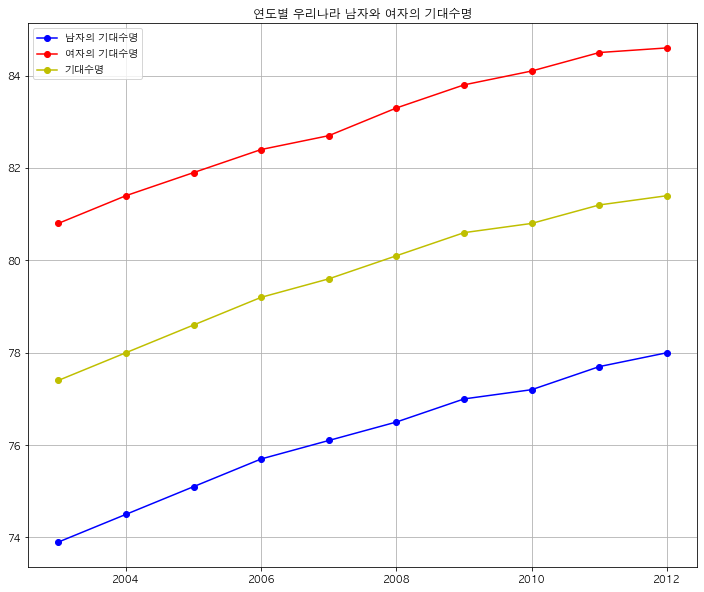

연도    2003  2004  2005  2006  2007  2008  2009  2010  2011  2012
기대수명  77.4  78.0  78.6  79.2  79.6  80.1  80.6  80.8  81.2  81.4
남자    73.9  74.5  75.1  75.7  76.1  76.5  77.0  77.2  77.7  78.0
여자    80.8  81.4  81.9  82.4  82.7  83.3  83.8  84.1  84.5  84.6


연도,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
기대수명,77.4,78.0,78.6,79.2,79.6,80.1,80.6,80.8,81.2,81.4
남자,73.9,74.5,75.1,75.7,76.1,76.5,77.0,77.2,77.7,78.0
여자,80.8,81.4,81.9,82.4,82.7,83.3,83.8,84.1,84.5,84.6


In [248]:
#29번
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (12, 10)  

#dataframe 설정
columns = [i for i in range(2003, 2013)]
df = pd.DataFrame(columns=columns)

df.columns.name = '연도'
df.loc['기대수명'] = [77.4, 78.0, 78.6, 79.2, 79.6, 80.1, 80.6, 80.8, 81.2, 81.4]
df.loc['남자'] = [73.9, 74.5, 75.1, 75.7, 76.1, 76.5, 77.0, 77.2, 77.7, 78.0]
df.loc['여자'] = [80.8, 81.4, 81.9, 82.4, 82.7, 83.3, 83.8, 84.1, 84.5, 84.6]
## 대푯값

# 평균값
AVG_life = sum(df.loc['기대수명']) / len(df.loc['기대수명'])
print("\n2003년부터 2012년까지 기대수명의 평균: ", int(AVG_life))
AVG_man = sum(df.loc['남자']) / len(df.loc['남자'])
print("\n2003년부터 2012년까지 남자 기대수명의 평균: ", int(AVG_man))
AVG_woman = sum(df.loc['여자'] / len(df.loc['여자']))
print("\n2003년부터 2012년까지 여자 기대수명의 평균: ", int(AVG_woman))
#중앙값
CENTER_value = sorted(df.loc['기대수명'])
N = len(CENTER_value)

if N%2 == 0 : # 짝수일 경우    
    M = (CENTER_value[int(N/2)]+CENTER_value[int(N/2+1)])/2   
    print(f'\n기대수명의 중앙값(짝수): {M} ')
else : # 홀수일 경우
    idx = int((N+1)/2)
    M = CENTER_value[idx-1]
    print(f'\n기대수명의 중앙값(홀수): {M} ')

#matplotlib을 통한 그래프 표현
plt.plot(columns, df.loc['남자'], marker='o', label='남자의 기대수명' , color='b')
plt.plot(columns, df.loc['여자'], marker='o', label='여자의 기대수명' , color='r')
plt.plot(columns, df.loc['기대수명'], marker='o', label='기대수명' , color='y')
plt.legend()
plt.title('연도별 우리나라 남자와 여자의 기대수명')
plt.grid()
plt.show()

print(df)
df



In [249]:
# 29번 - 일차방정식을 통한 2020년도 기대수명 예측

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (12, 10)  

columns = [i for i in range(2003, 2013)]
df = pd.DataFrame(columns=columns)

df.columns.name = '연도'
df.loc['기대수명'] = [77.4, 78.0, 78.6, 79.2, 79.6, 80.1, 80.6, 80.8, 81.2, 81.4]
df.loc['남자'] = [73.9, 74.5, 75.1, 75.7, 76.1, 76.5, 77.0, 77.2, 77.7, 78.0]
df.loc['여자'] = [80.8, 81.4, 81.9, 82.4, 82.7, 83.3, 83.8, 84.1, 84.5, 84.6]

x1 = 2003
x2 = 2012

m_y1 = 73.9
m_y2 = 78.0 
w_y1 = 80.8
w_y2 = 84.6

m_a = (m_y2-m_y1)/(x2-x1)
w_a = (w_y2-w_y1)/(x2-x1)

m_b = -m_a*2003 + 73.9
w_b = -w_a*2003 + 80.8

m_y = m_a*2020 + m_b #2020년도 남자 기대수명
w_y = w_a*2020 + w_b #2020년도 여자 기대수명

df['2020'] = [round((m_y+w_y)/2, 1), round(m_y, 1), round(w_y, 1)]
print(df)
df

연도    2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2020
기대수명  77.4  78.0  78.6  79.2  79.6  80.1  80.6  80.8  81.2  81.4  84.8
남자    73.9  74.5  75.1  75.7  76.1  76.5  77.0  77.2  77.7  78.0  81.6
여자    80.8  81.4  81.9  82.4  82.7  83.3  83.8  84.1  84.5  84.6  88.0


연도,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2020
기대수명,77.4,78.0,78.6,79.2,79.6,80.1,80.6,80.8,81.2,81.4,84.8
남자,73.9,74.5,75.1,75.7,76.1,76.5,77.0,77.2,77.7,78.0,81.6
여자,80.8,81.4,81.9,82.4,82.7,83.3,83.8,84.1,84.5,84.6,88.0


# 4장

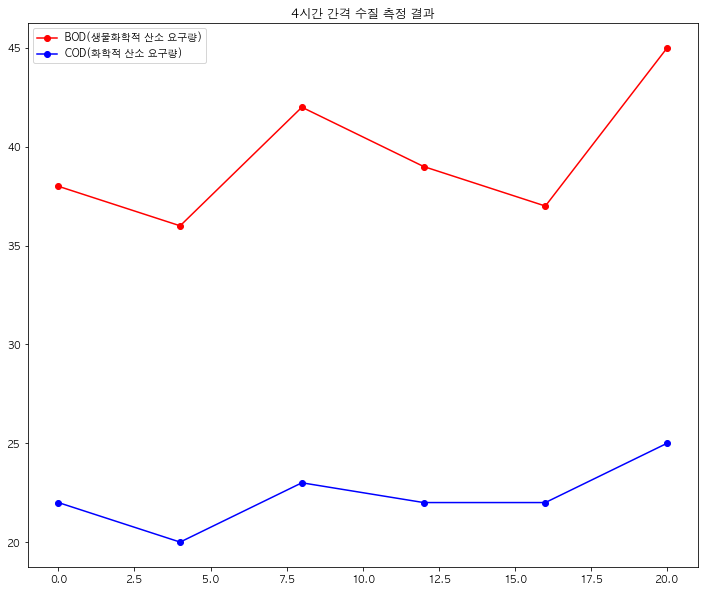

BOD의 평균: 39
COD의 평균: 22

BOD의 모 표준편차: 3.1
COD의 모 표준편차: 1.5

BOD의 표본 표준편차: 3.4
COD의 표본 표준편차: 1.6

BOD의 변동계수:  0.09
COD의 변동계수:  0.07
시각   0   4   8   12  16  20
BOD  38  36  42  39  37  45
COD  22  20  23  22  22  25


시각,0,4,8,12,16,20
BOD,38,36,42,39,37,45
COD,22,20,23,22,22,25


In [250]:
#29번
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (12, 10)  

#dataframe 설정
columns = [i for i in range(0, 24, 4)]
df = pd.DataFrame(columns=columns)

df.columns.name = '시각'

df.loc['BOD'] = [38, 36, 42, 39, 37, 45]
df.loc['COD'] = [22, 20, 23, 22, 22, 25]

#matplotlib을 통한 그래프 표현
plt.title('4시간 간격 수질 측정 결과')
plt.plot(columns, df.loc['BOD'], marker='o', label='BOD(생물화학적 산소 요구량)', color='r')
plt.plot(columns, df.loc['COD'], marker='o', label='COD(화학적 산소 요구량)', color='b')
plt.legend()
plt.show()

#BOD, COD의 평균
AVG_BOD = sum((df.loc['BOD'])) / len(df.loc['BOD'])
AVG_COD = sum((df.loc['COD'])) / len(df.loc['COD'])
print("BOD의 평균:",int(AVG_BOD))
print("COD의 평균:",int(AVG_COD))
print("")

#BOD, COD의 표준편차
std_BOD = np.std(df.loc['BOD'], ddof=0) #BOD의 모 표준편차

print(f'BOD의 모 표준편차: {std_BOD:1.2}')
std_COD = np.std(df.loc['COD'], ddof=0) #BOD의 모 표준편차
print(f'COD의 모 표준편차: {std_COD:1.2}\n')

std_BOD = np.std(df.loc['BOD'], ddof=1) #BOD의 표본 표준편차
print(f'BOD의 표본 표준편차: {std_BOD:1.2}')
std_COD = np.std(df.loc['COD'], ddof=1) #COD의 표본 표준편차
print(f'COD의 표본 표준편차: {std_COD:1.2}')

#BOD, COD의 변동계수
BOD_cov = std_BOD / AVG_BOD #변동계수
COD_cov = std_COD / AVG_COD #변동계수
print("")
print('BOD의 변동계수: ', round(BOD_cov,2))
print('COD의 변동계수: ', round(COD_cov,2))

#dataframe 출력
print(df)
df

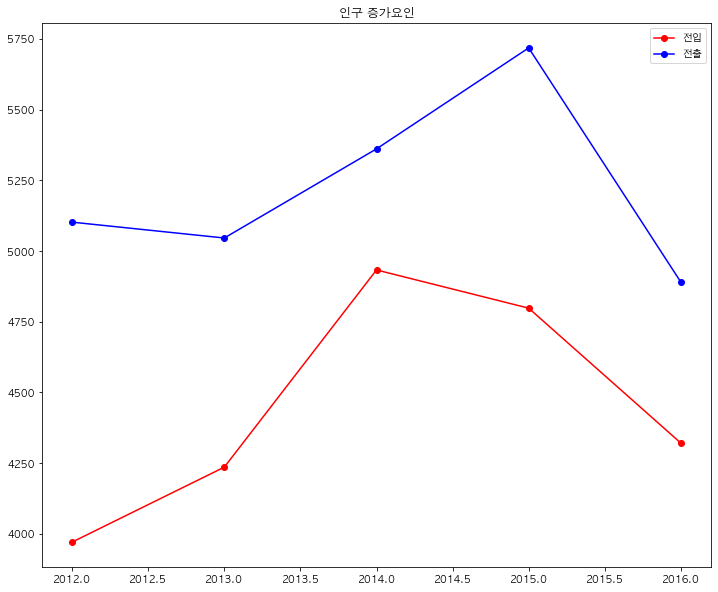

지난 5년간 전입의 평균: 4451
지난 5년간 전출의 평균: 5223


전입 기준 순이동에 대한 평균: -771
전입의 모 표준편차: 359
전출의 모 표준편차: 290

전입의 표본 표준편차: 401
전출의 표본 표준편차: 324

전입의 변동계수:  0.09
전출의 변동계수:  0.06
연도  2012  2013  2014  2015  2016
전입  3971  4236  4933  4798  4321
전출  5102  5046  5361  5718  4890


연도,2012,2013,2014,2015,2016
전입,3971,4236,4933,4798,4321
전출,5102,5046,5361,5718,4890


In [251]:
# 30번
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (12, 10)  

#dataframe 설정
columns = [i for i in range(2012, 2017)]
df = pd.DataFrame(columns=columns)

df.columns.name = '연도'

df.loc['전입'] = [3971, 4236, 4933, 4798, 4321]
df.loc['전출'] = [5102, 5046, 5361, 5718, 4890]

#matplotlib으로 그래프 표현
plt.title('인구 증가요인')
plt.plot(columns, df.loc['전입'], marker='o', label='전입', color='r')
plt.plot(columns, df.loc['전출'], marker='o', label='전출', color='b')
plt.legend()
plt.show()

#전입, 전출의 평균
AVG_in = sum((df.loc['전입']))/len(df.loc['전입'])
AVG_out = sum((df.loc['전출']))/len(df.loc['전출'])
print(f'지난 5년간 전입의 평균: {int(AVG_in)}')
print(f'지난 5년간 전출의 평균: {int(AVG_out)}\n')
print("")

#전입을 기준으로 순이동에 대한 평균
total = AVG_in - AVG_out
AVG_to = np.mean(total)
print(f'전입 기준 순이동에 대한 평균: {int(AVG_to)}')

#전입, 전출에 대한 표준편차
std_in = np.std(df.loc['전입'], ddof=0)
print(f'전입의 모 표준편차: {int(std_in)}')
std_out = np.std(df.loc['전출'], ddof=0)
print(f'전출의 모 표준편차: {int(std_out)}')

print("")
std_in = np.std(df.loc['전입'], ddof=1)
print(f'전입의 표본 표준편차: {int(std_in)}')
std_out = np.std(df.loc['전출'], ddof=1)
print(f'전출의 표본 표준편차: {int(std_out)}')

#전입, 전출에 대한 변동계수
in_cov = std_in / AVG_in  
out_cov = std_out / AVG_out   
print("")
print('전입의 변동계수: ', round(in_cov,2))
print('전출의 변동계수: ', round(out_cov,2))

#dataframe 출력
print(df)
df